In [18]:
# Information from class lecture
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

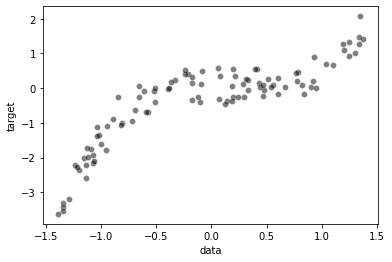

In [5]:
full_data = pd.DataFrame({"data": data, "target": target})
_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

In [7]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

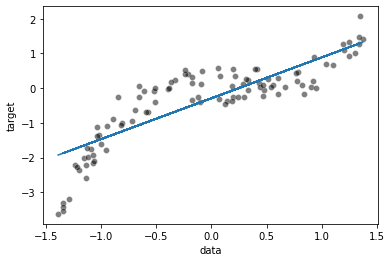

In [8]:
# First approximation

weight = 1.18
intercept = -0.29

ax = sns.scatterplot(data=full_data, x='data', y='target',
                     color="black", alpha=0.5)
_ = ax.plot(full_data.data, f(full_data.data, weight, intercept))


In [9]:
# Adding a new feature x^2 and x^3
rng = np.random.RandomState(0)
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

full_data = pd.DataFrame({"input_feature": data, "target": target})
data = data.reshape((-1, 1))
data.shape

(100, 1)

weight: 1.18, intercept: -0.29


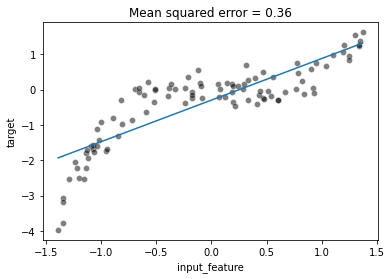

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(data, target)
target_predicted = linear_regression.predict(data)
mse = mean_squared_error(target, target_predicted)
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

print(f"weight: {linear_regression.coef_[0]:.2f}, "
      f"intercept: {linear_regression.intercept_:.2f}")

### Tree Regressor

In [82]:
# Tree regressor
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
target_predicted = tree.predict(data)
mse = mean_squared_error(target, target_predicted)

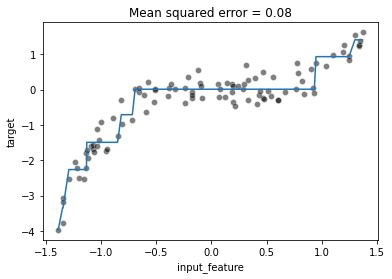

In [83]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

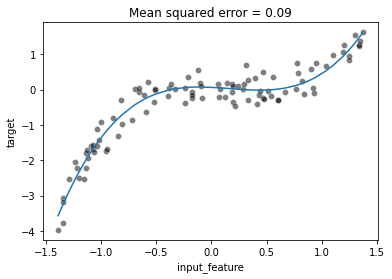

In [12]:
data_expanded = np.concatenate([data, data ** 2, data ** 3], axis=1)
linear_regression.fit(data_expanded, target)
target_predicted = linear_regression.predict(data_expanded)
mse = mean_squared_error(target, target_predicted)
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

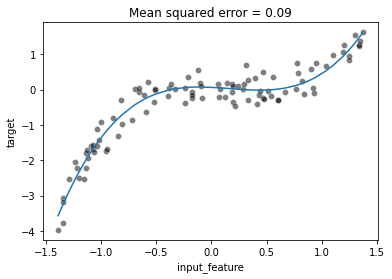

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression(),
)
polynomial_regression.fit(data, target)
target_predicted = polynomial_regression.predict(data)
mse = mean_squared_error(target, target_predicted)
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

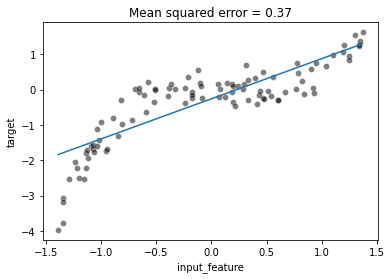

In [14]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
svr.fit(data, target)
target_predicted = svr.predict(data)
mse = mean_squared_error(target, target_predicted)
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

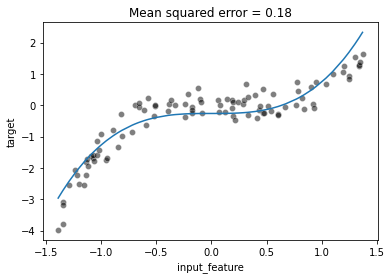

In [15]:
svr = SVR(kernel="poly", degree=3)
svr.fit(data, target)
target_predicted = svr.predict(data)
mse = mean_squared_error(target, target_predicted)
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

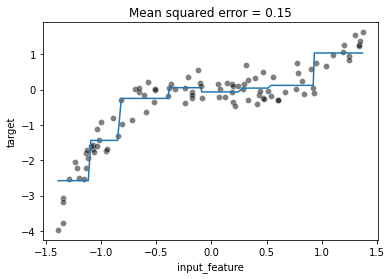

In [16]:
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=8), LinearRegression(),
)
binned_regression.fit(data, target)
target_predicted = binned_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

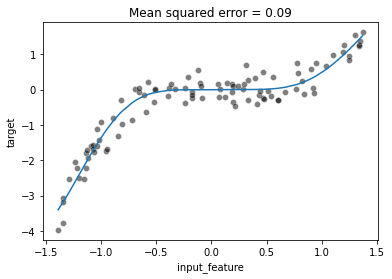

In [17]:
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(n_components=5), LinearRegression(),
)
nystroem_regression.fit(data, target)
target_predicted = nystroem_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")